In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("C:\CDAC\ML\Topic 3\ev_charging_patterns.csv")

In [4]:
df

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,User_1316,Nissan Leaf,100.000000,Station_57,New York,2024-02-24 19:00:00,2024-02-24 20:30:00,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,DC Fast Charger,Commuter
1316,User_1317,BMW i3,100.000000,Station_40,New York,2024-02-24 20:00:00,2024-02-24 20:44:00,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,Level 2,Casual Driver
1317,User_1318,Nissan Leaf,100.000000,Station_374,New York,2024-02-24 21:00:00,2024-02-24 23:03:00,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,DC Fast Charger,Commuter
1318,User_1319,Chevy Bolt,85.000000,Station_336,San Francisco,2024-02-24 22:00:00,2024-02-24 23:20:00,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,Level 2,Commuter


# Preprocessing

- Clean the data
- Standardize using z-score(StandardScaler)
- Impute outliers

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

In [6]:
df['Charger Type'].unique()

array(['DC Fast Charger', 'Level 1', 'Level 2'], dtype=object)

In [8]:
labels={'Charger Type':{'DC Fast Charger':2, 'Level 1':0, 'Level 2':1}}

In [16]:
df.drop(columns=['User ID','Charging Station ID','Charging Station Location','Charging Start Time','Charging End Time'],inplace=True)

In [17]:
df.replace(labels,inplace=True)
df

,Vehicle Model,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,BMW i3,108.463007,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,2,Commuter
1,Hyundai Kona,100.000000,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,0,Casual Driver
2,Chevy Bolt,75.000000,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,1,Commuter
3,Hyundai Kona,50.000000,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,0,Long-Distance Traveler
4,Hyundai Kona,50.000000,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,0,Long-Distance Traveler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,Nissan Leaf,100.000000,42.011654,1.426444,5.895475,22.081164,Evening,Sunday,39.204102,83.915952,239.601075,1.919655,7.0,2,Commuter
1316,BMW i3,100.000000,68.185853,3.238212,18.388012,5.067806,Evening,Tuesday,31.456375,93.096461,164.376022,34.029775,4.0,1,Casual Driver
1317,Nissan Leaf,100.000000,18.895102,3.267122,45.482066,37.255002,Evening,Tuesday,71.903081,78.678879,226.519258,20.358761,5.0,2,Commuter
1318,Chevy Bolt,85.000000,13.756252,2.754527,38.148183,39.046146,Afternoon,Sunday,76.187997,65.926573,291.494076,24.134598,5.0,1,Commuter


In [13]:
df["Charging Station Location"].unique()

array(['Houston', 'San Francisco', 'Los Angeles', 'Chicago', 'New York'],
      dtype=object)

In [20]:
df_ohe=pd.get_dummies(df)
df_ohe

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),...,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,User Type_Casual Driver,User Type_Commuter,User Type_Long-Distance Traveler
0,108.463007,60.712346,0.591363,36.389181,13.087717,29.371576,86.119962,293.602111,27.947953,2.0,...,False,False,False,False,False,True,False,False,True,False
1,100.000000,12.339275,3.133652,30.677735,21.128448,10.115778,84.664344,112.112804,14.311026,3.0,...,False,True,False,False,False,False,False,True,False,False
2,75.000000,19.128876,2.452653,27.513593,35.667270,6.854604,69.917615,71.799253,21.002002,2.0,...,False,False,False,False,True,False,False,False,True,False
3,50.000000,79.457824,1.266431,32.882870,13.036239,83.120003,99.624328,199.577785,38.316313,1.0,...,False,False,True,False,False,False,False,False,False,True
4,50.000000,19.629104,2.019765,10.215712,10.161471,54.258950,63.743786,203.661847,-7.834199,1.0,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,100.000000,42.011654,1.426444,5.895475,22.081164,39.204102,83.915952,239.601075,1.919655,7.0,...,False,False,False,True,False,False,False,False,True,False
1316,100.000000,68.185853,3.238212,18.388012,5.067806,31.456375,93.096461,164.376022,34.029775,4.0,...,False,False,False,False,False,True,False,True,False,False
1317,100.000000,18.895102,3.267122,45.482066,37.255002,71.903081,78.678879,226.519258,20.358761,5.0,...,False,False,False,False,False,True,False,False,True,False
1318,85.000000,13.756252,2.754527,38.148183,39.046146,76.187997,65.926573,291.494076,24.134598,5.0,...,False,False,False,True,False,False,False,False,True,False


In [21]:
df_ohe.fillna(df_ohe.median(),inplace=True)

In [22]:
df_ohe.shape

(1320, 30)

In [29]:
#Train and test split 

from sklearn.model_selection import train_test_split
X_train,X_test = train_test_split(df_ohe,test_size=0.3,random_state=7)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
print(scaler.fit(X_train))
X_train.loc[:,:]=scaler.transform(X_train.loc[:,:])
X_test.loc[:,:]=scaler.transform(X_test.loc[:,:])

StandardScaler()


C:\Users\Admin\AppData\Local\Temp\ipykernel_15196\3108596639.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.27863192 -1.16491699  1.27863192  0.05685747 -1.16491699  1.27863192
  1.27863192  0.05685747 -1.16491699 -1.16491699  1.27863192 -1.16491699
 -1.16491699  1.27863192 -1.16491699  1.27863192 -1.16491699  1.27863192
  1.27863192  1.27863192  1.27863192 -1.16491699  1.27863192 -1.16491699
  1.27863192  1.27863192  0.05685747  1.27863192 -1.16491699  1.27863192
  0.05685747 -1.16491699 -1.16491699  1.27863192 -1.16491699 -1.16491699
  0.05685747  1.27863192  1.27863192 -1.16491699  0.05685747 -1.16491699
  0.05685747 -1.16491699 -1.16491699  0.05685747  0.05685747 -1.16491699
  1.27863192  1.27863192  0.05685747  0.05685747  1.27863192 -1.16491699
  0.05685747 -1.16491699  1.27863192  0.05685747  1.27863192 -1.16491699
  1.27863192  1.27863192  0.05685747  0.05685747  1.27863192 -1.16491699
  0.05685747

In [34]:
X_train.describe()
X_test.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),...,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,User Type_Casual Driver,User Type_Commuter,User Type_Long-Distance Traveler
count,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,396.000000,...,396.000000,396.000000,396.000000,396.000000,396.000000,3.960000e+02,396.000000,396.000000,396.000000,396.000000
mean,0.056631,-0.019113,0.054600,0.023713,-0.013141,0.002196,-0.049918,-0.046248,0.037848,0.079319,...,-0.054818,0.005204,-0.004973,0.102658,0.066768,8.971499e-18,-0.099343,-0.000781,0.031643,-0.031325
std,1.040105,1.005097,0.915447,1.035064,1.015560,0.964635,1.104169,1.005223,0.921089,0.994006,...,0.943784,1.006656,0.996517,1.101299,1.079122,1.001265e+00,0.898932,1.000940,1.010247,0.989780
min,-3.453261,-1.958981,-1.918522,-1.804040,-1.891894,-1.579906,-4.097733,-1.825983,-1.700953,-1.538559,...,-0.417227,-0.402820,-0.429669,-0.393700,-0.352261,-4.225771e-01,-0.436717,-0.667839,-0.743600,-0.710553
25%,-0.598299,-0.868274,-0.633817,-0.939135,-0.890089,-0.862880,-0.798435,-0.877921,-0.741451,-0.673670,...,-0.417227,-0.402820,-0.429669,-0.393700,-0.352261,-4.225771e-01,-0.436717,-0.667839,-0.743600,-0.710553
50%,0.039830,-0.003621,0.047718,-0.018141,-0.086724,-0.047065,0.002413,-0.029053,0.036025,0.191220,...,-0.417227,-0.402820,-0.429669,-0.393700,-0.352261,-4.225771e-01,-0.436717,-0.667839,-0.743600,-0.710553
75%,0.530698,0.806263,0.779654,0.893198,0.872363,0.731692,0.739343,0.804335,0.813266,1.056109,...,-0.417227,-0.402820,-0.429669,-0.393700,-0.352261,-4.225771e-01,-0.436717,1.497366,1.344809,1.407354
max,5.145500,3.896773,3.397146,3.608903,4.374684,2.989627,4.557995,2.905570,1.821683,3.022537,...,2.396774,2.482497,2.327373,2.540003,2.838807,2.366432e+00,2.289813,1.497366,1.344809,1.407354


# Outlier Detection
- Z-score
- IQR based

In [36]:
# Impute the outliers using IQR method
X_train_imp = X_train.copy()
for col in X_train_imp.columns:
    q1,q3 = X_train_imp[col].quantile([0.25,0.75])
    IQR = q3 - q1
    min_valid_val = q1 - 1.5*IQR
    max_valid_val = q3 + 1.5*IQR
    
    X_train_imp.loc[ ( X_train_imp[col] > max_valid_val ) , col ] = max_valid_val
    X_train_imp.loc[ ( X_train_imp[col] < min_valid_val ) , col ] = min_valid_val

X_train_imp.max()>max_valid_val
#X_train_imp.min()<min_valid_val

Battery Capacity (kWh)                      False
Energy Consumed (kWh)                       False
Charging Duration (hours)                   False
Charging Rate (kW)                          False
Charging Cost (USD)                         False
State of Charge (Start %)                   False
State of Charge (End %)                     False
Distance Driven (since last charge) (km)    False
Temperature (°C)                            False
Vehicle Age (years)                         False
Charger Type                                False
Vehicle Model_BMW i3                        False
Vehicle Model_Chevy Bolt                    False
Vehicle Model_Hyundai Kona                  False
Vehicle Model_Nissan Leaf                   False
Vehicle Model_Tesla Model 3                 False
Time of Day_Afternoon                       False
Time of Day_Evening                         False
Time of Day_Morning                         False
Time of Day_Night                           False


In [40]:
X_train_imp

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),...,Day of Week_Friday,Day of Week_Monday,Day of Week_Saturday,Day of Week_Sunday,Day of Week_Thursday,Day of Week_Tuesday,Day of Week_Wednesday,User Type_Casual Driver,User Type_Commuter,User Type_Long-Distance Traveler
25,0.039830,-0.118864,1.243908,-1.001347,1.511018,1.283681,0.278456,-0.859698,0.424683,-1.106114,...,-0.417227,-0.40282,-0.429669,-0.3937,-0.352261,-0.422577,-0.436717,-0.667839,1.344809,-0.710553
800,-0.776494,-0.092049,-1.207603,1.145937,0.216889,0.357633,0.718251,0.499821,1.347943,-0.241225,...,-0.417227,-0.40282,-0.429669,-0.3937,-0.352261,-0.422577,-0.436717,1.497366,-0.743600,-0.710553
409,1.267000,-1.048693,-0.369597,0.576308,0.758306,-1.428230,1.065961,-1.728837,0.467669,1.488554,...,-0.417227,-0.40282,-0.429669,-0.3937,-0.352261,-0.422577,-0.436717,-0.667839,-0.743600,1.407354
222,-1.357284,-0.340309,0.811103,-1.506188,-0.928878,-0.324913,1.422634,0.770378,-1.568892,0.191220,...,-0.417227,-0.40282,-0.429669,-0.3937,-0.352261,-0.422577,-0.436717,1.497366,-0.743600,-0.710553
976,1.359277,0.487335,0.912626,1.089887,-0.060898,-0.628267,1.187954,-0.105667,0.843837,0.271909,...,-0.417227,-0.40282,-0.429669,-0.3937,-0.352261,-0.422577,-0.436717,-0.667839,1.344809,-0.710553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,-1.187341,-1.880632,-1.337311,-1.289079,0.012228,-0.904118,0.216408,-1.061251,0.714538,-0.673670,...,-0.417227,-0.40282,-0.429669,-0.3937,-0.352261,-0.422577,-0.436717,1.497366,-0.743600,-0.710553
502,-1.187341,0.963960,-1.352639,-0.037831,-0.357020,-0.572999,1.058379,0.638343,0.503739,-0.673670,...,-0.417227,-0.40282,-0.429669,-0.3937,-0.352261,-0.422577,-0.436717,-0.667839,1.344809,-0.710553
537,-0.598299,0.157790,1.068251,1.711352,0.583238,-0.858331,-0.187737,-1.409643,0.039653,0.191220,...,-0.417227,-0.40282,-0.429669,-0.3937,-0.352261,-0.422577,-0.436717,1.497366,-0.743600,-0.710553
1220,0.039830,0.122915,-1.030487,-0.964458,0.612782,0.419221,-0.938081,-1.371949,1.491696,-1.538559,...,-0.417227,-0.40282,-0.429669,-0.3937,-0.352261,-0.422577,-0.436717,-0.667839,-0.743600,1.407354


# Apply PCA

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca=PCA(random_state=7) # generate maximum components

In [41]:
pca.fit(X_train_imp ) # on training data

PCA(random_state=7)

In [42]:
pca.n_components_

30

In [44]:
pca.components_[0]

array([ 2.78269698e-02, -1.12869057e-01, -2.28383143e-02,  1.25035465e-01,
        3.07472710e-02,  6.08094619e-02,  5.95978210e-02,  8.33782635e-02,
        7.57051290e-02, -8.26497661e-02, -3.42635889e-02, -1.74762486e-17,
        1.71639460e-17,  3.18047985e-17,  3.66176597e-17, -1.32703550e-17,
        2.21281277e-17, -7.63895438e-02,  8.55220220e-02,  2.14207135e-17,
       -3.39661318e-17,  3.74958991e-17,  1.17060658e-17, -2.79386960e-17,
       -6.90698458e-18,  2.31654870e-17,  2.34026939e-17, -1.41126420e-01,
        7.34739692e-01, -6.07074176e-01])

In [46]:
pca.explained_variance_ratio_

array([9.99055049e-02, 9.68100240e-02, 8.71537710e-02, 7.27485092e-02,
       7.06406137e-02, 6.61207521e-02, 6.57341286e-02, 6.34107945e-02,
       6.10061780e-02, 5.91195014e-02, 5.85849119e-02, 5.60103788e-02,
       5.43069829e-02, 4.81215030e-02, 4.03264459e-02, 1.53183425e-16,
       1.16155754e-16, 8.54200821e-17, 5.05216281e-17, 4.35968459e-17,
       3.68594870e-17, 2.83662710e-17, 1.97723879e-17, 1.18004566e-17,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [51]:
#Variance captured by each component
explained_variance= pca.explained_variance_ratio_
print(explained_variance)
cummulative_variance=np.cumsum(explained_variance)
print(cummulative_variance)

[9.99055049e-02 9.68100240e-02 8.71537710e-02 7.27485092e-02
 7.06406137e-02 6.61207521e-02 6.57341286e-02 6.34107945e-02
 6.10061780e-02 5.91195014e-02 5.85849119e-02 5.60103788e-02
 5.43069829e-02 4.81215030e-02 4.03264459e-02 1.53183425e-16
 1.16155754e-16 8.54200821e-17 5.05216281e-17 4.35968459e-17
 3.68594870e-17 2.83662710e-17 1.97723879e-17 1.18004566e-17
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
[0.0999055  0.19671553 0.2838693  0.35661781 0.42725842 0.49337918
 0.5591133  0.6225241  0.68353028 0.74264978 0.80123469 0.85724507
 0.91155205 0.95967355 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


C:\Users\Admin\AppData\Local\Temp\ipykernel_15196\629422227.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


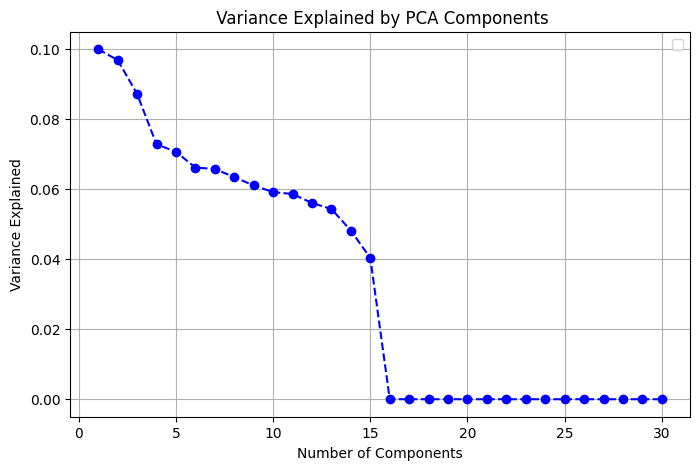

In [52]:
#Plot explained variance
plt.figure(figsize=(8,5))
plt.plot(range(1,len(explained_variance)+1),explained_variance,marker='o',linestyle='--',color='b')
plt.title(' Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
#plt.axhline(y=09.,color='r',linestyle='--',label='90% Variance')
#plt.axhline(y=0.95,color='g',linestyle='--',label='95% Variance')
plt.legend()
plt.grid()
plt.show()

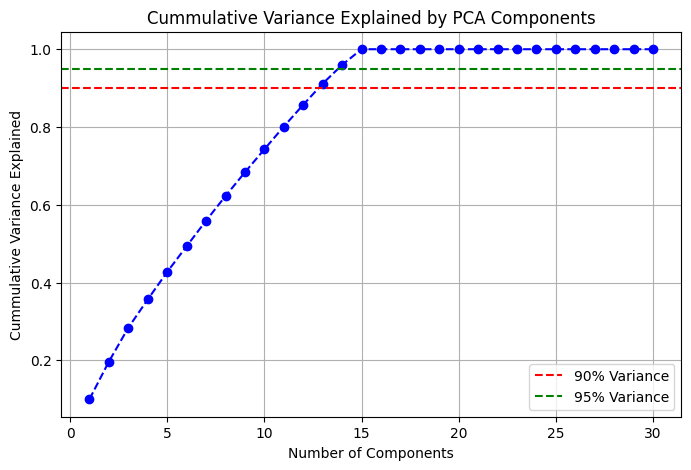

In [48]:
#Plot cummulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1,len(cummulative_variance)+1),cummulative_variance,marker='o',linestyle='--',color='b')
plt.title('Cummulative Variance Explained by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cummulative Variance Explained')
plt.axhline(y=0.9,color='r',linestyle='--',label='90% Variance')
plt.axhline(y=0.95,color='g',linestyle='--',label='95% Variance')
plt.legend()
plt.grid()
plt.show()

# How to select best components automatically?
-Select components whose total explained variance ration is greater than threshold

In [69]:
pca1 = PCA(n_components=0.95,random_state=7)
pca1.fit(X_train_imp)
# pca1.fit(X_test)

PCA(n_components=0.95, random_state=7)

In [70]:
pca1.explained_variance_ratio_

array([0.0999055 , 0.09681002, 0.08715377, 0.07274851, 0.07064061,
       0.06612075, 0.06573413, 0.06341079, 0.06100618, 0.0591195 ,
       0.05858491, 0.05601038, 0.05430698, 0.0481215 ])

In [71]:
X_train_imp.shape,X_test.shape

((924, 30), (396, 30))

In [72]:
X_train_pca=pca1.transform(X_train_imp)
X_test_pca= pca1.transform(X_test)

In [73]:
X_train_pca.shape,X_test_pca.shape

((924, 14), (396, 14))

# Apply Kernel PCA


In [74]:
from sklearn.decomposition import KernelPCA

In [82]:
kpca = KernelPCA(n_components=None,kernel='rbf',gamma=100,random_state=7)

In [83]:
kpca.fit(X_train_imp)

KernelPCA(gamma=100, kernel='rbf', random_state=7)

In [84]:
kpca.eigenvectors_.shape #no of columns is no of components generated

(924, 923)

In [85]:
kpca.eigenvalues_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [86]:
sorted(kpca.eigenvalues_,reverse=False)

[np.float64(0.9999999999999952),
 np.float64(0.9999999999999957),
 np.float64(0.9999999999999959),
 np.float64(0.999999999999996),
 np.float64(0.9999999999999962),
 np.float64(0.9999999999999964),
 np.float64(0.9999999999999964),
 np.float64(0.9999999999999966),
 np.float64(0.9999999999999966),
 np.float64(0.9999999999999968),
 np.float64(0.9999999999999968),
 np.float64(0.9999999999999968),
 np.float64(0.9999999999999969),
 np.float64(0.999999999999997),
 np.float64(0.999999999999997),
 np.float64(0.999999999999997),
 np.float64(0.999999999999997),
 np.float64(0.9999999999999971),
 np.float64(0.9999999999999971),
 np.float64(0.9999999999999971),
 np.float64(0.9999999999999971),
 np.float64(0.9999999999999972),
 np.float64(0.9999999999999972),
 np.float64(0.9999999999999973),
 np.float64(0.9999999999999973),
 np.float64(0.9999999999999973),
 np.float64(0.9999999999999973),
 np.float64(0.9999999999999974),
 np.float64(0.9999999999999974),
 np.float64(0.9999999999999974),
 np.float64(0.9

# Polynomial Kernel

In [92]:
kpca=KernelPCA(n_components=None,kernel='poly',degree=3,gamma=1,random_state=7)

In [93]:
kpca.fit(X_train_imp)

KernelPCA(gamma=1, kernel='poly', random_state=7)

In [94]:
kpca.eigenvectors_.shape[1]

722

In [95]:
sorted(kpca.eigenvalues_,reverse=True)

[np.float64(171482.88840378085),
 np.float64(165960.22939234282),
 np.float64(153534.91700978985),
 np.float64(121519.16135661479),
 np.float64(117683.9344794908),
 np.float64(114074.31384641348),
 np.float64(111392.44779910061),
 np.float64(108892.44836581008),
 np.float64(103414.97523369582),
 np.float64(102008.41606033473),
 np.float64(97724.95239194568),
 np.float64(92653.60449119555),
 np.float64(90943.21912612769),
 np.float64(84596.33293450491),
 np.float64(83671.1755562837),
 np.float64(69541.40931258554),
 np.float64(67224.83914890328),
 np.float64(61723.615028084765),
 np.float64(59863.20540842685),
 np.float64(58008.98279038325),
 np.float64(56904.99541816292),
 np.float64(55601.8932381975),
 np.float64(54601.975204320246),
 np.float64(53911.91362711247),
 np.float64(52713.421361459834),
 np.float64(52263.62547388038),
 np.float64(51205.94420954318),
 np.float64(49391.233724637095),
 np.float64(49262.8817891485),
 np.float64(49000.535515371535),
 np.float64(48013.99974124475